In [1]:
import scipy
import json
import numpy as np
import pandas as pd
import statsmodels.formula.api as sum
from statsmodels.formula.api import ols
from scipy.stats import f_oneway,mstats, levene, shapiro, friedmanchisquare, wilcoxon
import glob
import matplotlib.pyplot as plt
import os

In [2]:
df_All = pd.DataFrame()
for idx,file in enumerate(sorted(glob.glob("data/*Menu.json"))):
    data = json.load(open(file))
    part = pd.DataFrame(data["trails"])
    # if "Panel" in file:
    #     part["menuType"] =1
    # if "Radial" in file:
    #     part["menuType"]=0
    # if "Dwell" in file:
    #     part["modality"]=0
    # if "Pinch" in file:
    #     part["modality"]=2
    # if "GazeButton" in file:
    #     part["modality"]=3
    part["userID"] = idx // 6

    df_All = pd.concat([df_All,part], ignore_index=True)

In [3]:
df_All_correct = df_All.loc[df_All["correctness"]!=False]

In [4]:
eval_grouping = df_All.groupby(['userID','menuType','modality'])["completionTime"].median().reset_index()

In [5]:
eval_grouping["logTime"] = np.log2(eval_grouping["completionTime"])

In [6]:
# 19 * 6 = 114
eval_grouping

,userID,menuType,modality,completionTime,logTime
0,0,0,0,7489.897949,12.870730
1,0,0,2,2475.148438,11.273299
2,0,0,3,2995.031616,11.548356
3,0,1,0,5795.563965,12.500733
4,0,1,2,2961.666016,11.532193
...,...,...,...,...,...
109,18,0,2,2795.081787,11.448675
110,18,0,3,3108.673340,11.602083
111,18,1,0,8167.699707,12.995714
112,18,1,2,2961.726562,11.532223


In [7]:
df_eval = eval_grouping

## MODALITIES

In [8]:
df_dwell = df_eval.loc[df_eval["modality"]==0]
df_border = df_eval.loc[df_eval["modality"]==1]
df_cont = df_eval.loc[df_eval["modality"]==2]
df_gazeBut = df_eval.loc[df_eval["modality"]==3]

## MENUTYPES

In [9]:
df_radial = df_eval.loc[df_eval["menuType"]==0]
df_panel = df_eval.loc[df_eval["menuType"]==1]


## All together

In [10]:
df_panel_dwell = df_eval.loc[(df_eval["menuType"]==1)&(df_eval["modality"]==0)]
df_panel_cont = df_eval.loc[(df_eval["menuType"]==1)&(df_eval["modality"]==2)]
df_panel_gb = df_eval.loc[(df_eval["menuType"]==1)&(df_eval["modality"]==3)]

df_radial_dwell = df_eval.loc[(df_eval["menuType"]==0)&(df_eval["modality"]==0)]
df_radial_cont = df_eval.loc[(df_eval["menuType"]==0)&(df_eval["modality"]==2)]
df_radial_gb = df_eval.loc[(df_eval["menuType"]==0)&(df_eval["modality"]==3)]


## Distribution Plots

(array([1., 4., 4., 5., 3., 4., 4., 3., 1., 1., 2., 0., 1., 0., 1., 1., 1.,
        0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 1.]),
 array([ 4.08611597,  4.57148919,  5.05686241,  5.54223564,  6.02760886,
         6.51298209,  6.99835531,  7.48372853,  7.96910176,  8.45447498,
         8.93984821,  9.42522143,  9.91059465, 10.39596788, 10.8813411 ,
        11.36671432, 11.85208755, 12.33746077, 12.822834  , 13.30820722,
        13.79358044, 14.27895367, 14.76432689, 15.24970012, 15.73507334,
        16.22044656, 16.70581979, 17.19119301, 17.67656624, 18.16193946,
        18.64731268, 19.13268591, 19.61805913, 20.10343235, 20.58880558,
        21.0741788 , 21.55955203, 22.04492525, 22.53029847, 23.0156717 ,
        23.50104492]),
 <BarContainer object of 40 artists>)

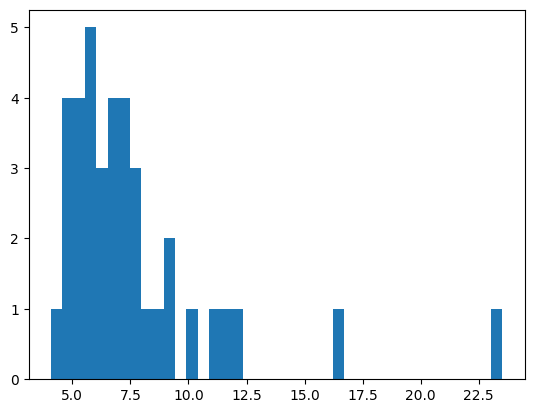

In [11]:
plt.hist(df_dwell["completionTime"]/1000, bins=40)

(array([1., 0., 0., 0., 4., 4., 0., 3., 2., 2., 3., 2., 2., 3., 2., 1., 0.,
        1., 2., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
        0., 0., 0., 0., 0., 1.]),
 array([11.99651443, 12.05961251, 12.12271058, 12.18580865, 12.24890672,
        12.31200479, 12.37510286, 12.43820093, 12.501299  , 12.56439708,
        12.62749515, 12.69059322, 12.75369129, 12.81678936, 12.87988743,
        12.9429855 , 13.00608357, 13.06918165, 13.13227972, 13.19537779,
        13.25847586, 13.32157393, 13.384672  , 13.44777007, 13.51086814,
        13.57396622, 13.63706429, 13.70016236, 13.76326043, 13.8263585 ,
        13.88945657, 13.95255464, 14.01565271, 14.07875079, 14.14184886,
        14.20494693, 14.268045  , 14.33114307, 14.39424114, 14.45733921,
        14.52043728]),
 <BarContainer object of 40 artists>)

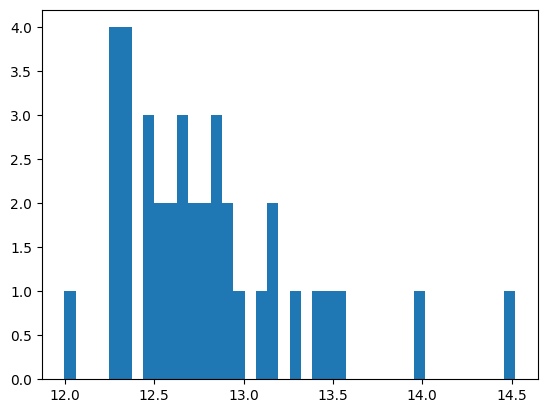

In [12]:
plt.hist(df_dwell["logTime"], bins=40)

(array([1., 0., 1., 0., 3., 0., 1., 1., 1., 1., 2., 3., 2., 5., 1., 1., 1.,
        2., 1., 0., 2., 0., 0., 2., 1., 1., 0., 0., 0., 1., 0., 0., 2., 1.,
        0., 0., 0., 0., 0., 1.]),
 array([2.06222607, 2.12730051, 2.19237495, 2.25744939, 2.32252383,
        2.38759827, 2.45267271, 2.51774714, 2.58282158, 2.64789602,
        2.71297046, 2.7780449 , 2.84311934, 2.90819377, 2.97326821,
        3.03834265, 3.10341709, 3.16849153, 3.23356597, 3.29864041,
        3.36371484, 3.42878928, 3.49386372, 3.55893816, 3.6240126 ,
        3.68908704, 3.75416147, 3.81923591, 3.88431035, 3.94938479,
        4.01445923, 4.07953367, 4.14460811, 4.20968254, 4.27475698,
        4.33983142, 4.40490586, 4.4699803 , 4.53505474, 4.60012917,
        4.66520361]),
 <BarContainer object of 40 artists>)

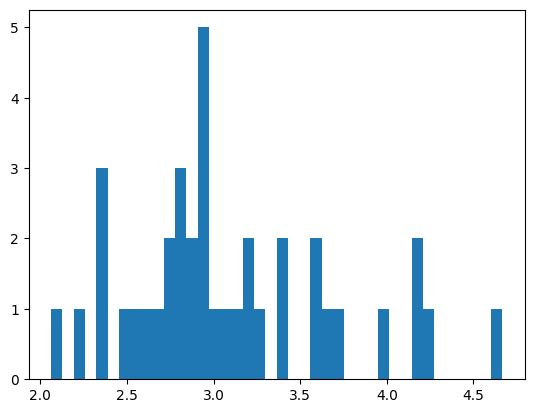

In [13]:
plt.hist(df_cont["completionTime"]/1000, bins=40)

(array([1., 0., 0., 0., 1., 1., 2., 0., 1., 0., 1., 0., 2., 0., 3., 2., 2.,
        5., 1., 1., 0., 3., 1., 0., 2., 0., 0., 3., 1., 0., 0., 0., 1., 0.,
        2., 1., 0., 0., 0., 1.]),
 array([11.00998678, 11.03943022, 11.06887366, 11.0983171 , 11.12776054,
        11.15720398, 11.18664742, 11.21609085, 11.24553429, 11.27497773,
        11.30442117, 11.33386461, 11.36330805, 11.39275149, 11.42219493,
        11.45163836, 11.4810818 , 11.51052524, 11.53996868, 11.56941212,
        11.59885556, 11.628299  , 11.65774244, 11.68718587, 11.71662931,
        11.74607275, 11.77551619, 11.80495963, 11.83440307, 11.86384651,
        11.89328995, 11.92273338, 11.95217682, 11.98162026, 12.0110637 ,
        12.04050714, 12.06995058, 12.09939402, 12.12883746, 12.15828089,
        12.18772433]),
 <BarContainer object of 40 artists>)

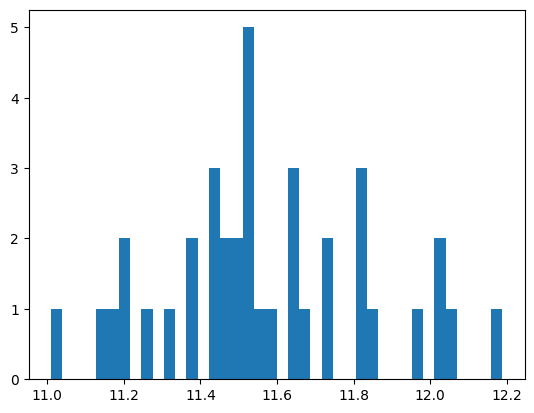

In [14]:
plt.hist(df_cont["logTime"], bins=40)

(array([2., 2., 0., 0., 3., 3., 0., 4., 2., 0., 3., 1., 1., 0., 2., 1., 1.,
        3., 2., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0.,
        0., 0., 1., 0., 0., 1.]),
 array([2.44563562, 2.52283315, 2.60003067, 2.6772282 , 2.75442572,
        2.83162325, 2.90882077, 2.9860183 , 3.06321582, 3.14041335,
        3.21761087, 3.2948084 , 3.37200592, 3.44920345, 3.52640097,
        3.6035985 , 3.68079602, 3.75799355, 3.83519107, 3.9123886 ,
        3.98958612, 4.06678365, 4.14398117, 4.2211787 , 4.29837622,
        4.37557375, 4.45277127, 4.5299688 , 4.60716632, 4.68436385,
        4.76156137, 4.8387589 , 4.91595642, 4.99315395, 5.07035147,
        5.147549  , 5.22474652, 5.30194405, 5.37914157, 5.4563391 ,
        5.53353662]),
 <BarContainer object of 40 artists>)

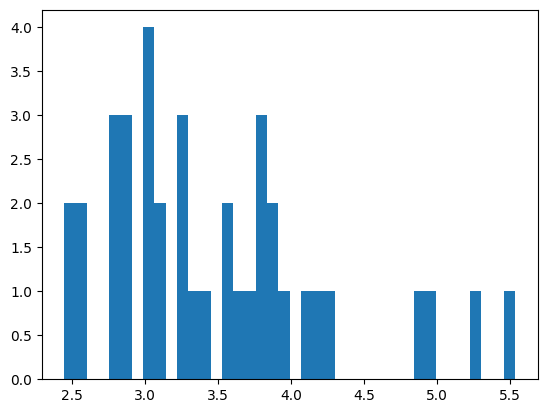

In [15]:
plt.hist(df_gazeBut["completionTime"]/1000, bins=40)

(array([1., 3., 0., 0., 0., 2., 0., 2., 2., 1., 3., 2., 0., 1., 2., 1., 1.,
        0., 2., 1., 1., 3., 1., 2., 0., 1., 2., 0., 0., 0., 0., 0., 0., 1.,
        1., 0., 0., 1., 0., 1.]),
 array([11.25599375, 11.28544356, 11.31489337, 11.34434318, 11.37379299,
        11.4032428 , 11.43269261, 11.46214242, 11.49159223, 11.52104204,
        11.55049185, 11.57994166, 11.60939146, 11.63884127, 11.66829108,
        11.69774089, 11.7271907 , 11.75664051, 11.78609032, 11.81554013,
        11.84498994, 11.87443975, 11.90388956, 11.93333937, 11.96278918,
        11.99223898, 12.02168879, 12.0511386 , 12.08058841, 12.11003822,
        12.13948803, 12.16893784, 12.19838765, 12.22783746, 12.25728727,
        12.28673708, 12.31618689, 12.34563669, 12.3750865 , 12.40453631,
        12.43398612]),
 <BarContainer object of 40 artists>)

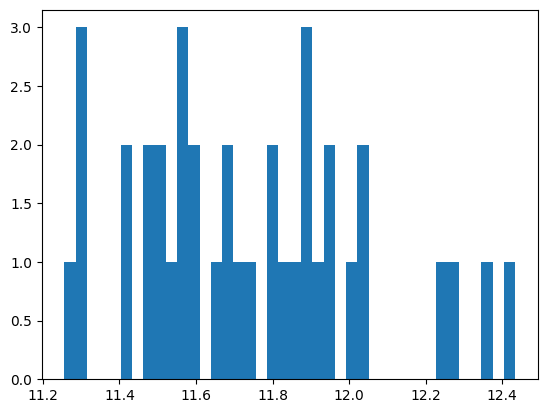

In [16]:
plt.hist(df_gazeBut["logTime"], bins=40)

## Mean/Median Completion Times

##### by Modality

In [17]:
print("MEAN")
print("Dwell: ", df_dwell["completionTime"].mean(), " STD: ", df_dwell["completionTime"].std())
print("Border: ",df_border["completionTime"].mean(), " STD: ", df_border["completionTime"].std())
print("Controller: ",df_cont["completionTime"].mean(), " STD: ", df_cont["completionTime"].std())
print("GazeButton: ",df_gazeBut["completionTime"].mean(), " STD: ", df_gazeBut["completionTime"].std())
print("MEDIAN")
print("Dwell: ", df_dwell["completionTime"].median())
print("Border: ",df_border["completionTime"].median())
print("Controller: ",df_cont["completionTime"].median())
print("GazeButton: ",df_gazeBut["completionTime"].median())

MEAN
Dwell:  7630.85259688528  STD:  3611.4182419243275
Border:  nan  STD:  nan
Controller:  3090.897406327097  STD:  603.2976911752323
GazeButton:  3489.0696571751646  STD:  765.265866738219
MEDIAN
Dwell:  6677.42041015625
Border:  nan
Controller:  2955.9478149414062
GazeButton:  3314.2330932617188


#### boxplot

(0.0, 24572.98586425781)

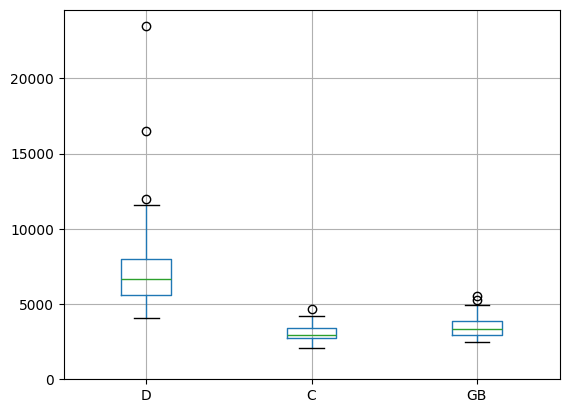

In [18]:
df_plot=pd.DataFrame()
df_plot["D"] = df_dwell.reset_index()["completionTime"]
df_plot["C"] = df_cont.reset_index()["completionTime"]
df_plot["GB"] = df_gazeBut.reset_index()["completionTime"]

ax =df_plot.boxplot()
ax.set_ylim(0)

(0.0, 24572.98586425781)

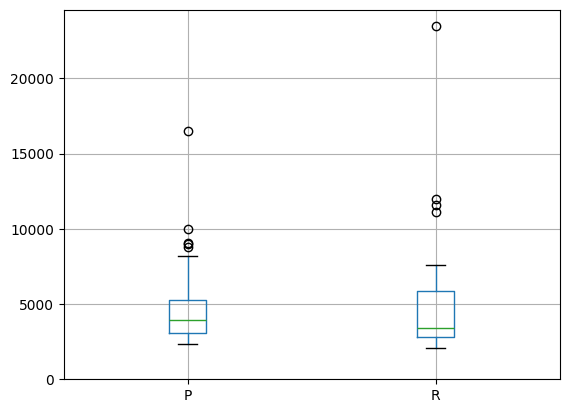

In [19]:
df_plot=pd.DataFrame()

df_plot["P"] = df_panel.reset_index()["completionTime"]
df_plot["R"] = df_radial.reset_index()["completionTime"]

ax =df_plot.boxplot()
ax.set_ylim(0)

In [20]:
print("MEAN")
print("pd: ", df_panel_dwell["completionTime"].mean(), " STD: ", df_panel_dwell["completionTime"].std())
print("pc: ", df_panel_cont["completionTime"].mean(), " STD: ", df_panel_cont["completionTime"].std())
print("pgb: ", df_panel_gb["completionTime"].mean(), " STD: ", df_panel_gb["completionTime"].std())
print("rd: ", df_radial_dwell["completionTime"].mean(), " STD: ", df_radial_dwell["completionTime"].std())
print("rc: ", df_radial_cont["completionTime"].mean(), " STD: ", df_radial_cont["completionTime"].std())
print("rgb: ", df_radial_gb["completionTime"].mean(), " STD: ", df_radial_gb["completionTime"].std())


MEAN
pd:  7130.3115876850325  STD:  2831.1097311053973
pc:  3249.8864360608554  STD:  572.5036359390989
pgb:  3660.076435289885  STD:  781.4864238680727
rd:  8131.393606085527  STD:  4273.77527957751
rc:  2931.9083765933387  STD:  605.8321631233009
rgb:  3318.062879060444  STD:  728.9320075308583


(0.0, 24572.98586425781)

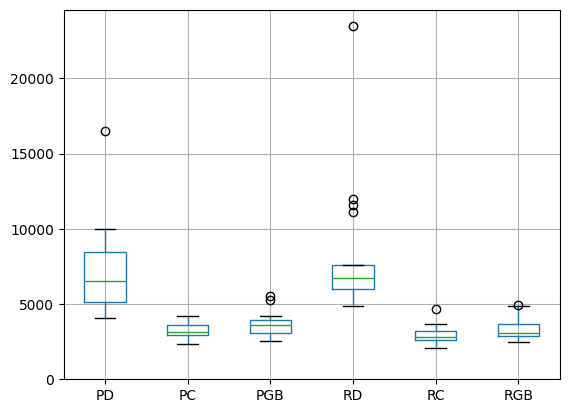

In [21]:
df_plot=pd.DataFrame()

df_plot["PD"] = df_panel_dwell.reset_index()["completionTime"]
df_plot["PC"] = df_panel_cont.reset_index()["completionTime"]
df_plot["PGB"] = df_panel_gb.reset_index()["completionTime"]
df_plot["RD"] = df_radial_dwell.reset_index()["completionTime"]
df_plot["RC"] = df_radial_cont.reset_index()["completionTime"]
df_plot["RGB"] = df_radial_gb.reset_index()["completionTime"]
ax =df_plot.boxplot()
ax.set_ylim(0)

##### by Menutype

In [22]:
print("Radial: ", df_radial["completionTime"].mean(), "sd: ", df_radial["completionTime"].std())
print("Panel: ",df_panel["completionTime"].mean(), "sd: ", df_panel["completionTime"].std())
print("Radial: ", df_radial["completionTime"].median())
print("Panel: ",df_panel["completionTime"].median())

Radial:  4793.788287246436 sd:  3443.0027192173757
Panel:  4680.091486345258 sd:  2441.700104915012
Radial:  3428.3663330078125
Panel:  3912.032958984375


In [23]:
print("PD: ", df_panel_dwell["completionTime"].mean(), " STD: ", df_panel_dwell["completionTime"].std())
print("Pc: ", df_panel_cont["completionTime"].mean(), " STD: ", df_panel_cont["completionTime"].std())
print("Pgb: ", df_panel_gb["completionTime"].mean(), " STD: ", df_panel_gb["completionTime"].std())
print("RD: ", df_radial_dwell["completionTime"].mean(), " STD: ", df_radial_dwell["completionTime"].std())
print("rc: ", df_radial_cont["completionTime"].mean(), " STD: ", df_radial_cont["completionTime"].std())
print("rgb: ", df_radial_gb["completionTime"].mean(), " STD: ", df_radial_gb["completionTime"].std())


PD:  7130.3115876850325  STD:  2831.1097311053973
Pc:  3249.8864360608554  STD:  572.5036359390989
Pgb:  3660.076435289885  STD:  781.4864238680727
RD:  8131.393606085527  STD:  4273.77527957751
rc:  2931.9083765933387  STD:  605.8321631233009
rgb:  3318.062879060444  STD:  728.9320075308583


# Statistical Analysis

## Check Normality for ANOVA


In [24]:
def check_normality(x):
    res = shapiro(x)
    
    res.statistic
    print(res.statistic, res.pvalue)
    if(res.pvalue<0.05):
        print("Sharpiro says Not normal")
    else:
        print("sharp hurray")
    return not(res.pvalue < 0.05)


def check_normality_all(conditions):
    results = []
    # Running the test for all unique pairs without repetition
    for (name_A, A) in conditions.items():
        result_ct = check_normality(A["completionTime"].to_numpy())
        result_log = check_normality(A["logTime"].to_numpy())
        results.append((result_ct, result_log))
        
    return results


conditions = {
    "Dwell": df_dwell,
    "GazeButton": df_gazeBut,
    "Controller": df_cont,
}
print(check_normality_all(conditions))

conditions = {
    "List": df_panel,
    "Pie": df_radial,
}
print(check_normality_all(conditions))

conditions = {
    "List Dwell": df_panel_dwell,
    "List GazeButton": df_panel_gb,
    "List Controller": df_panel_cont,
    "Pie Dwell": df_radial_dwell,
    "Pie GazeButton": df_radial_gb,
    "Pie Controller": df_radial_cont,
}
print(check_normality_all(conditions))

0.7050829785201855 1.9917284281553628e-07
Sharpiro says Not normal
0.8979762760910578 0.0022357416916725706
Sharpiro says Not normal
0.9218109426608668 0.011167393199725548
Sharpiro says Not normal
0.9631533678003787 0.24002421532017937
sharp hurray
0.9534595645769278 0.11580756568217077
sharp hurray
0.9804682768844912 0.7341374140257922
sharp hurray
[(False, False), (False, True), (True, True)]
0.7490564441607492 1.623903499615495e-08
Sharpiro says Not normal
0.9238932248087726 0.001520809436438653
Sharpiro says Not normal
0.6546147693150056 2.582558230072067e-10
Sharpiro says Not normal
0.8966700860874844 0.0001469258672757064
Sharpiro says Not normal
[(False, False), (False, False)]
0.7900334865410148 0.0008218447396678266
Sharpiro says Not normal
0.9231215156104854 0.12925825753252795
sharp hurray
0.9159605110252629 0.09530167039849116
sharp hurray
0.9626875798011105 0.626330149310617
sharp hurray
0.928483851273795 0.1623922755645189
sharp hurray
0.9395541010865397 0.25885825694117

## Revise dataset for statistical analysis
* Group by users x layouts x modality

In [25]:
df_eval

,userID,menuType,modality,completionTime,logTime
0,0,0,0,7489.897949,12.870730
1,0,0,2,2475.148438,11.273299
2,0,0,3,2995.031616,11.548356
3,0,1,0,5795.563965,12.500733
4,0,1,2,2961.666016,11.532193
...,...,...,...,...,...
109,18,0,2,2795.081787,11.448675
110,18,0,3,3108.673340,11.602083
111,18,1,0,8167.699707,12.995714
112,18,1,2,2961.726562,11.532223


In [26]:
'''
df_radial = df_eval.loc[df_eval["menuType"]==0]
df_panel = df_eval.loc[df_eval["menuType"]==1]

df_dwell = df_eval.loc[df_eval["modality"]==0]
df_border = df_eval.loc[df_eval["modality"]==1]
df_cont = df_eval.loc[df_eval["modality"]==2]
df_gazeBut = df_eval.loc[df_eval["modality"]==3]
'''


# Define mappings for IDs to letters
menuType_mapping = {0: 'Pie', 1: 'List'}  # Adjust IDs and letters as needed
modality_mapping = {0: 'Dwell', 1: 'BorderCrossing', 2: 'Controller', 3: 'GazeButton'}  # Adjust IDs and letters as needed
userID_mapping = dict(zip(range(19),range(1, 20)))

df_eval['userID'] = df_eval['userID'].map(userID_mapping)
df_eval['menuType'] = df_eval['menuType'].map(menuType_mapping)
df_eval['modality'] = df_eval['modality'].map(modality_mapping)

In [27]:
df_eval

,userID,menuType,modality,completionTime,logTime
0,1,Pie,Dwell,7489.897949,12.870730
1,1,Pie,Controller,2475.148438,11.273299
2,1,Pie,GazeButton,2995.031616,11.548356
3,1,List,Dwell,5795.563965,12.500733
4,1,List,Controller,2961.666016,11.532193
...,...,...,...,...,...
109,19,Pie,Controller,2795.081787,11.448675
110,19,Pie,GazeButton,3108.673340,11.602083
111,19,List,Dwell,8167.699707,12.995714
112,19,List,Controller,2961.726562,11.532223


In [28]:
df_eval['menu_modality'] = df_eval['menuType'] + '_' + df_eval['modality']

In [29]:
df_eval

,userID,menuType,modality,completionTime,logTime,menu_modality
0,1,Pie,Dwell,7489.897949,12.870730,Pie_Dwell
1,1,Pie,Controller,2475.148438,11.273299,Pie_Controller
2,1,Pie,GazeButton,2995.031616,11.548356,Pie_GazeButton
3,1,List,Dwell,5795.563965,12.500733,List_Dwell
4,1,List,Controller,2961.666016,11.532193,List_Controller
...,...,...,...,...,...,...
109,19,Pie,Controller,2795.081787,11.448675,Pie_Controller
110,19,Pie,GazeButton,3108.673340,11.602083,Pie_GazeButton
111,19,List,Dwell,8167.699707,12.995714,List_Dwell
112,19,List,Controller,2961.726562,11.532223,List_Controller


## Frieman tests

In [30]:
import pingouin as pg

In [31]:
#pg.rm_anova(data=df_long,dv="SUS_score", subject="Users", within=["Interaction_Type","Menu_layout"],detailed=True)
#pg.friedman(data=df_eval, dv="completionTime", subject="userID", within=["menuType","modality"], method='chisq')
pg.friedman(data=df_eval, dv="completionTime", subject="userID", within="menuType", method='chisq')

,Source,W,ddof1,Q,p-unc
Friedman,menuType,0.00277,1,0.052632,0.818546


In [32]:
pg.friedman(data=df_eval, dv="completionTime", subject="userID", within="modality", method='chisq')

,Source,W,ddof1,Q,p-unc
Friedman,modality,0.867036,2,32.947368,7.007609e-08


In [33]:
pg.friedman(data=df_eval, dv="completionTime", subject="userID", within="menu_modality", method='chisq')

,Source,W,ddof1,Q,p-unc
Friedman,menu_modality,0.786624,5,74.729323,1.059508e-14


### Equivalence Test

In [34]:
pg.tost(df_panel["completionTime"], df_radial["completionTime"], bound=100, paired=True)

,bound,dof,pval
TOST,100,56,0.518897


In [35]:
pg.tost(df_panel["completionTime"], df_radial["completionTime"], bound=500, paired=True)

,bound,dof,pval
TOST,500,56,0.092435


In [36]:
pg.tost(df_panel["completionTime"], df_radial["completionTime"], bound=600, paired=True)

,bound,dof,pval
TOST,600,56,0.048299


In [37]:
pg.tost(df_panel["completionTime"], df_radial["completionTime"], bound=900, paired=True)

,bound,dof,pval
TOST,900,56,0.004197


In [38]:
# assert False

### Check if grouping affects the results

In [39]:
df_interaction = df_eval.groupby(['userID','modality'])["completionTime"].median().reset_index()
df_interaction

,userID,modality,completionTime
0,1,Controller,2718.407227
1,1,Dwell,6642.730957
2,1,GazeButton,4264.284119
3,2,Controller,2996.127075
4,2,Dwell,16745.372559
5,2,GazeButton,3265.178345
6,3,Controller,3420.253052
7,3,Dwell,6095.544678
8,3,GazeButton,3431.362854
9,4,Controller,2199.903198


In [40]:
pg.friedman(data=df_interaction, dv="completionTime", subject="userID", within="modality", method='chisq')

,Source,W,ddof1,Q,p-unc
Friedman,modality,0.867036,2,32.947368,7.007609e-08


## Wilcoxon post-hoc tests

In [41]:
import stateval

conditions = {
    "List Dwell": df_panel_dwell["completionTime"],
    "List GazeButton": df_panel_gb["completionTime"],
    "List Controller": df_panel_cont["completionTime"],
    "Pie Dwell": df_radial_dwell["completionTime"],
    "Pie GazeButton": df_radial_gb["completionTime"],
    "Pie Controller": df_radial_cont["completionTime"],
}


results_combinations, p_vals_combinations, effect_sizes_combinations = stateval.compare_all(conditions, posthoc_test=stateval.posthoc_wilcoxon)
print(results_combinations)
print(p_vals_combinations)
print(effect_sizes_combinations)

# Converting results to a DataFrame for a structured display
import pandas as pd
results_df = pd.DataFrame(results_combinations)
results_df

[{'Pair': 'List Dwell vs List GazeButton', 'Statistic': np.float64(0.0), 'P-value': np.float64(3.814697265625e-06), 'Effect Size': np.float64(1.0)}, {'Pair': 'List Dwell vs List Controller', 'Statistic': np.float64(0.0), 'P-value': np.float64(3.814697265625e-06), 'Effect Size': np.float64(1.0)}, {'Pair': 'List Dwell vs Pie Dwell', 'Statistic': np.float64(54.0), 'P-value': np.float64(0.104156494140625), 'Effect Size': np.float64(-0.43157894736842106)}, {'Pair': 'List Dwell vs Pie GazeButton', 'Statistic': np.float64(0.0), 'P-value': np.float64(3.814697265625e-06), 'Effect Size': np.float64(1.0)}, {'Pair': 'List Dwell vs Pie Controller', 'Statistic': np.float64(0.0), 'P-value': np.float64(3.814697265625e-06), 'Effect Size': np.float64(1.0)}, {'Pair': 'List GazeButton vs List Controller', 'Statistic': np.float64(38.0), 'P-value': np.float64(0.020412445068359375), 'Effect Size': np.float64(0.6000000000000001)}, {'Pair': 'List GazeButton vs Pie Dwell', 'Statistic': np.float64(0.0), 'P-value

,Pair,Statistic,P-value,Effect Size
0,List Dwell vs List GazeButton,0.0,0.000004,1.000000
1,List Dwell vs List Controller,0.0,0.000004,1.000000
2,List Dwell vs Pie Dwell,54.0,0.104156,-0.431579
3,List Dwell vs Pie GazeButton,0.0,0.000004,1.000000
4,List Dwell vs Pie Controller,0.0,0.000004,1.000000
5,List GazeButton vs List Controller,38.0,0.020412,0.600000
6,List GazeButton vs Pie Dwell,0.0,0.000004,-1.000000
7,List GazeButton vs Pie GazeButton,52.0,0.087429,0.452632
8,List GazeButton vs Pie Controller,9.0,0.000126,0.905263
9,List Controller vs Pie Dwell,0.0,0.000004,-1.000000


In [42]:
conditions = {
    "List": df_panel["completionTime"],
    "Pie": df_radial["completionTime"],
}
results_layouts, p_vals_layouts, effect_sizes_layouts = stateval.compare_all(conditions)
print(results_layouts)
print(p_vals_layouts)
print(effect_sizes_layouts)

[{'Pair': 'List vs Pie', 'Statistic': np.float64(705.0), 'P-value': np.float64(0.33636607304527744), 'Effect Size': np.float64(0.147005444646098)}]
[0.33636607]
[0.14700544]


In [43]:
conditions = {
    "Dwell": df_dwell["completionTime"],
    "GazeButton": df_gazeBut["completionTime"],
    "Controller": df_cont["completionTime"],
}

results_interactions, p_vals_interactions, effect_sizes_interactions = stateval.compare_all(conditions)
print(results_interactions)
print(p_vals_interactions)
print(effect_sizes_interactions)

[{'Pair': 'Dwell vs GazeButton', 'Statistic': np.float64(0.0), 'P-value': np.float64(7.275957614183426e-12), 'Effect Size': np.float64(1.0)}, {'Pair': 'Dwell vs Controller', 'Statistic': np.float64(0.0), 'P-value': np.float64(7.275957614183426e-12), 'Effect Size': np.float64(1.0)}, {'Pair': 'GazeButton vs Controller', 'Statistic': np.float64(117.0), 'P-value': np.float64(0.00011373990128049627), 'Effect Size': np.float64(0.6842105263157894)}]
[7.27595761e-12 7.27595761e-12 1.13739901e-04]
[1.         1.         0.68421053]


In [44]:
p_vals = np.concatenate((p_vals_layouts, p_vals_interactions, p_vals_combinations))
p_vals

array([3.36366073e-01, 7.27595761e-12, 7.27595761e-12, 1.13739901e-04,
       3.81469727e-06, 3.81469727e-06, 1.04156494e-01, 3.81469727e-06,
       3.81469727e-06, 2.04124451e-02, 3.81469727e-06, 8.74290466e-02,
       1.25885010e-04, 3.81469727e-06, 7.38090515e-01, 3.91769409e-03,
       3.81469727e-06, 3.81469727e-06, 2.39944458e-03])

In [45]:
from statsmodels.stats.multitest import multipletests

a,b,c,d = multipletests(p_vals, alpha=0.05, method='holm', maxiter=1, is_sorted=False, returnsorted=False)
print(np.sum(a), np.sum(~a), a)

14 5 [False  True  True  True  True  True False  True  True False  True False
  True  True False  True  True  True  True]


## Revise dataset for plotting

In [46]:
df_eval.head()

,userID,menuType,modality,completionTime,logTime,menu_modality
0,1,Pie,Dwell,7489.897949,12.870730,Pie_Dwell
1,1,Pie,Controller,2475.148438,11.273299,Pie_Controller
2,1,Pie,GazeButton,2995.031616,11.548356,Pie_GazeButton
3,1,List,Dwell,5795.563965,12.500733,List_Dwell
4,1,List,Controller,2961.666016,11.532193,List_Controller


In [47]:
# Define mappings for IDs to letters
modality_mapping = {'Dwell': 'Gaze-only', 'Controller': 'Controller-only', 'GazeButton': 'Gaze-and-Controller'}
menu_modality_mapping = {'Pie_Dwell': 'Pie & Gaze-only', 'Pie_Controller': 'Pie & Controller-only', 'Pie_GazeButton': 'Pie & Gaze-and-Controller',
                        'List_Dwell': 'List & Gaze-only', 'List_Controller': 'List & Controller-only', 'List_GazeButton': 'List & Gaze-and-Controller'}

df_eval['modality'] = df_eval['modality'].map(modality_mapping)
df_eval['menu_modality'] = df_eval['menu_modality'].map(menu_modality_mapping)

In [48]:
df_eval.head()

,userID,menuType,modality,completionTime,logTime,menu_modality
0,1,Pie,Gaze-only,7489.897949,12.870730,Pie & Gaze-only
1,1,Pie,Controller-only,2475.148438,11.273299,Pie & Controller-only
2,1,Pie,Gaze-and-Controller,2995.031616,11.548356,Pie & Gaze-and-Controller
3,1,List,Gaze-only,5795.563965,12.500733,List & Gaze-only
4,1,List,Controller-only,2961.666016,11.532193,List & Controller-only


## Plots

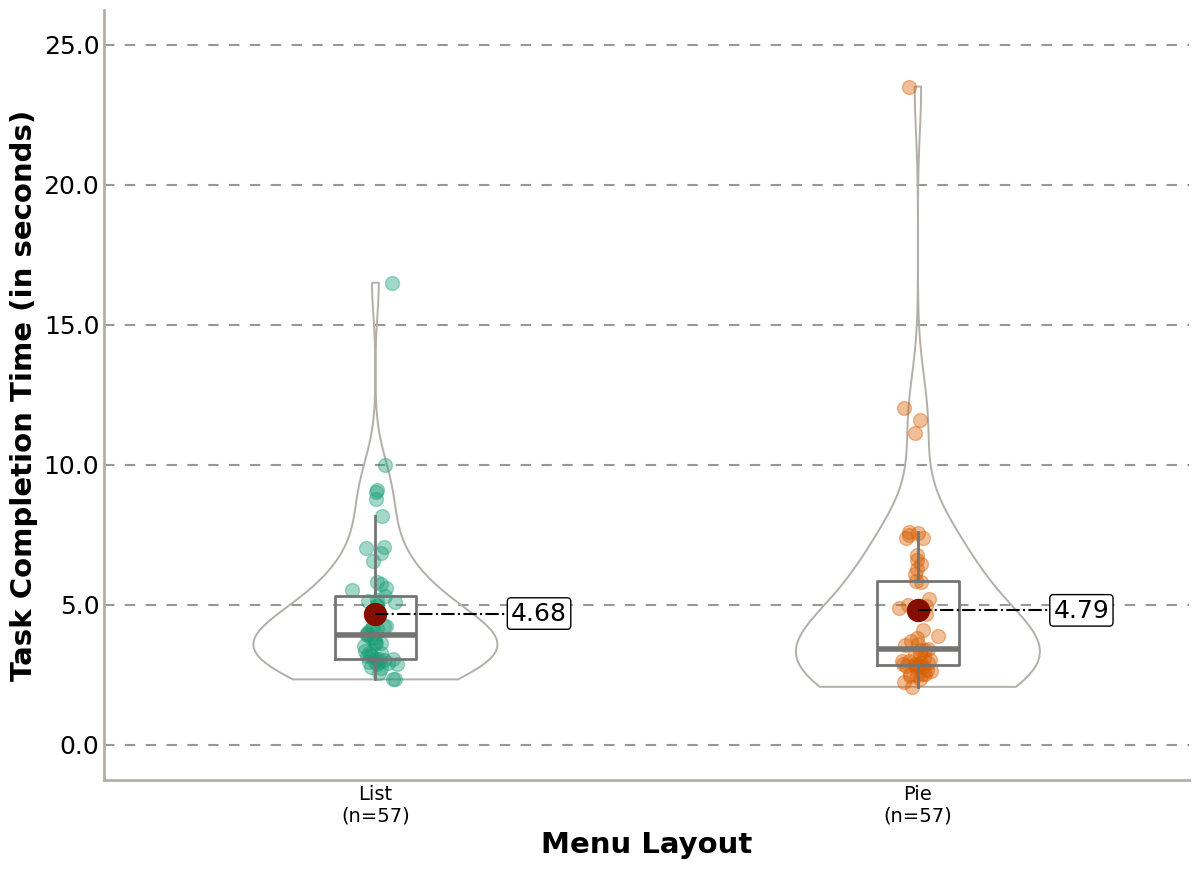

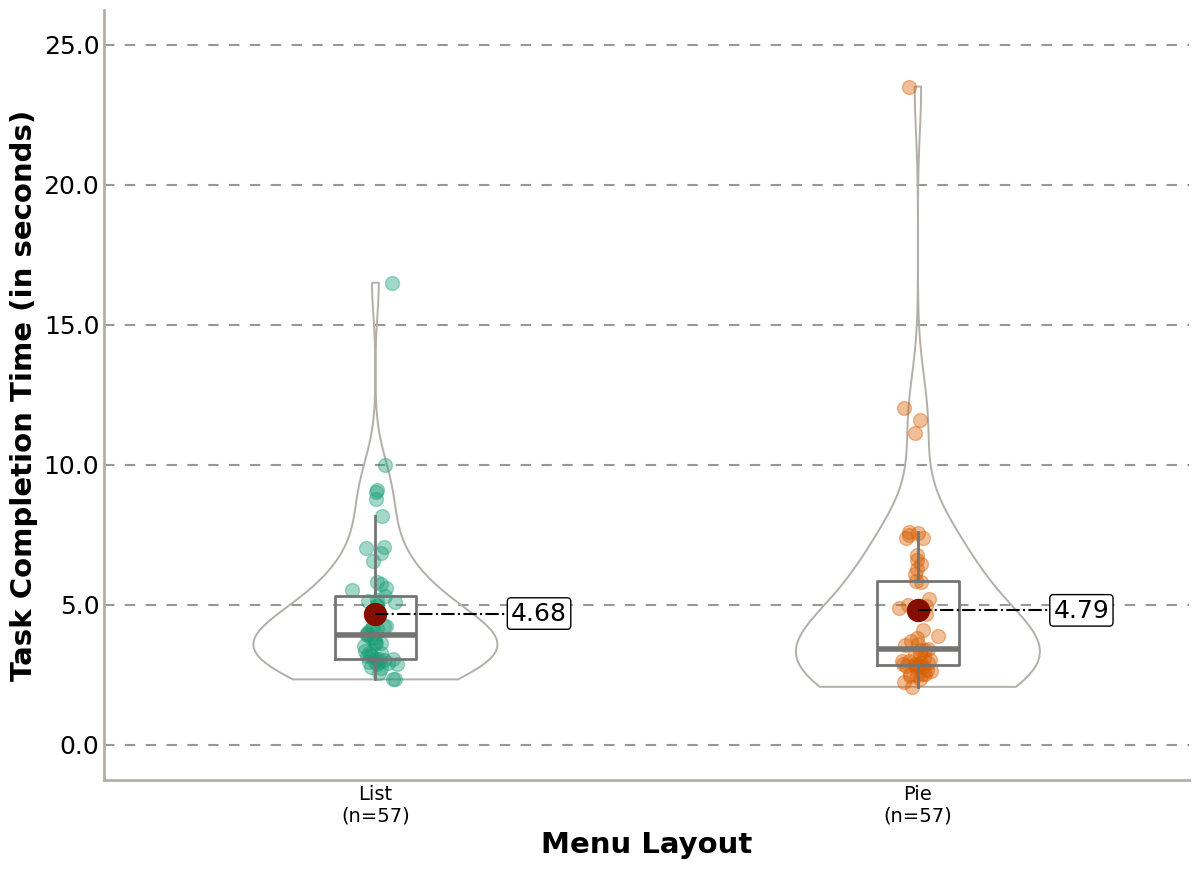

In [49]:
# Get the species, sorted alphabetically
species = sorted(df_eval["menuType"].unique())

# y_data is a list of length 3 containing the bill_length_mm values for each specie 
y_data = [df_eval[df_eval["menuType"] == specie]["completionTime"].values / 1000. for specie in species]

xlabel = "Menu Layout"
ylabel = "Task Completion Time (in seconds)"
x_lines = np.arange(0, 26, 5, dtype=np.float64)
    
stateval.make_plot(y_data, species, xlabel, ylabel, save_figure_as="plots/task-completion-time-layouts.png", x_lines=x_lines)

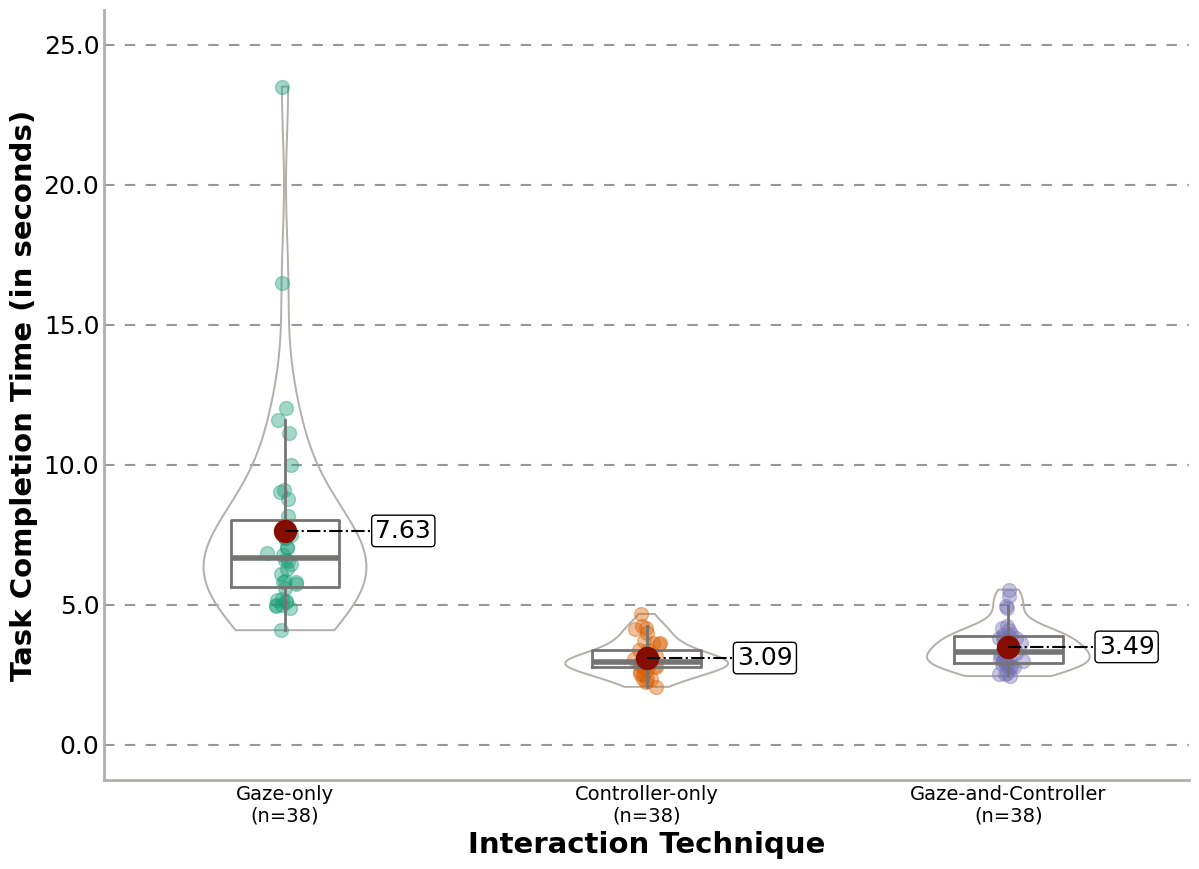

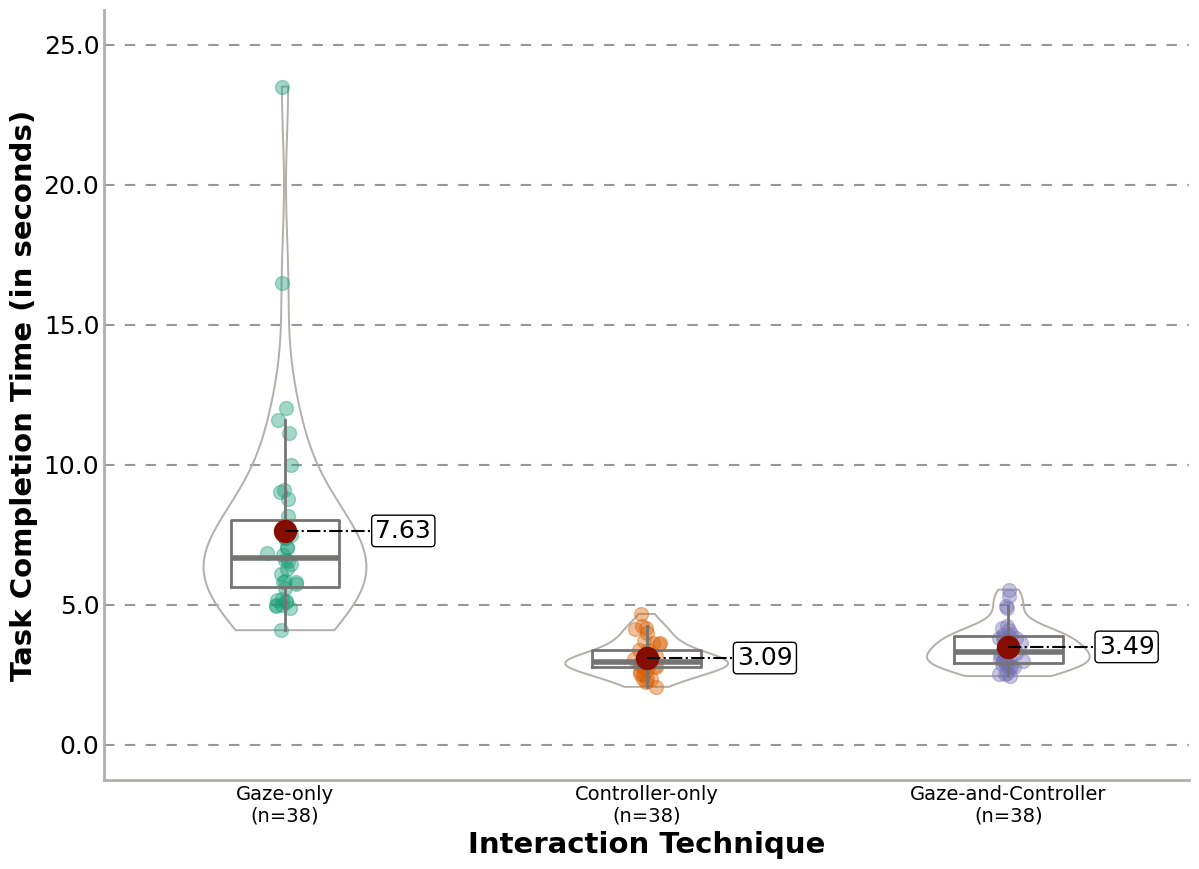

In [50]:
# Get the species, sorted alphabetically
species = (df_eval["modality"].unique())

# y_data is a list of length 3 containing the bill_length_mm values for each specie 
y_data = [df_eval[df_eval["modality"] == specie]["completionTime"].values / 1000. for specie in species]

xlabel = "Interaction Technique"
ylabel = "Task Completion Time (in seconds)"
x_lines = np.arange(0, 26, 5, dtype=np.float64)

stateval.make_plot(y_data, species, xlabel, ylabel, save_figure_as="plots/task-completion-time-interaction.png", x_lines=x_lines)

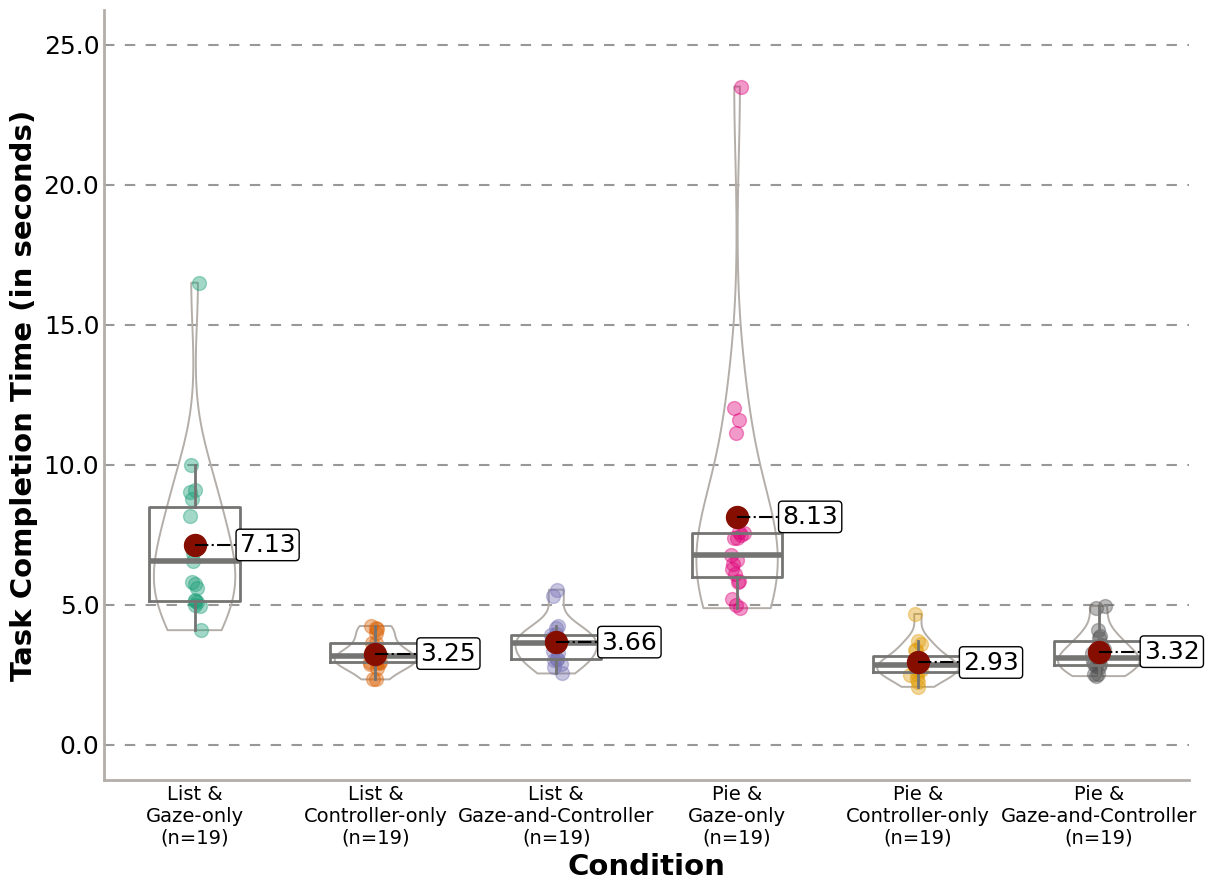

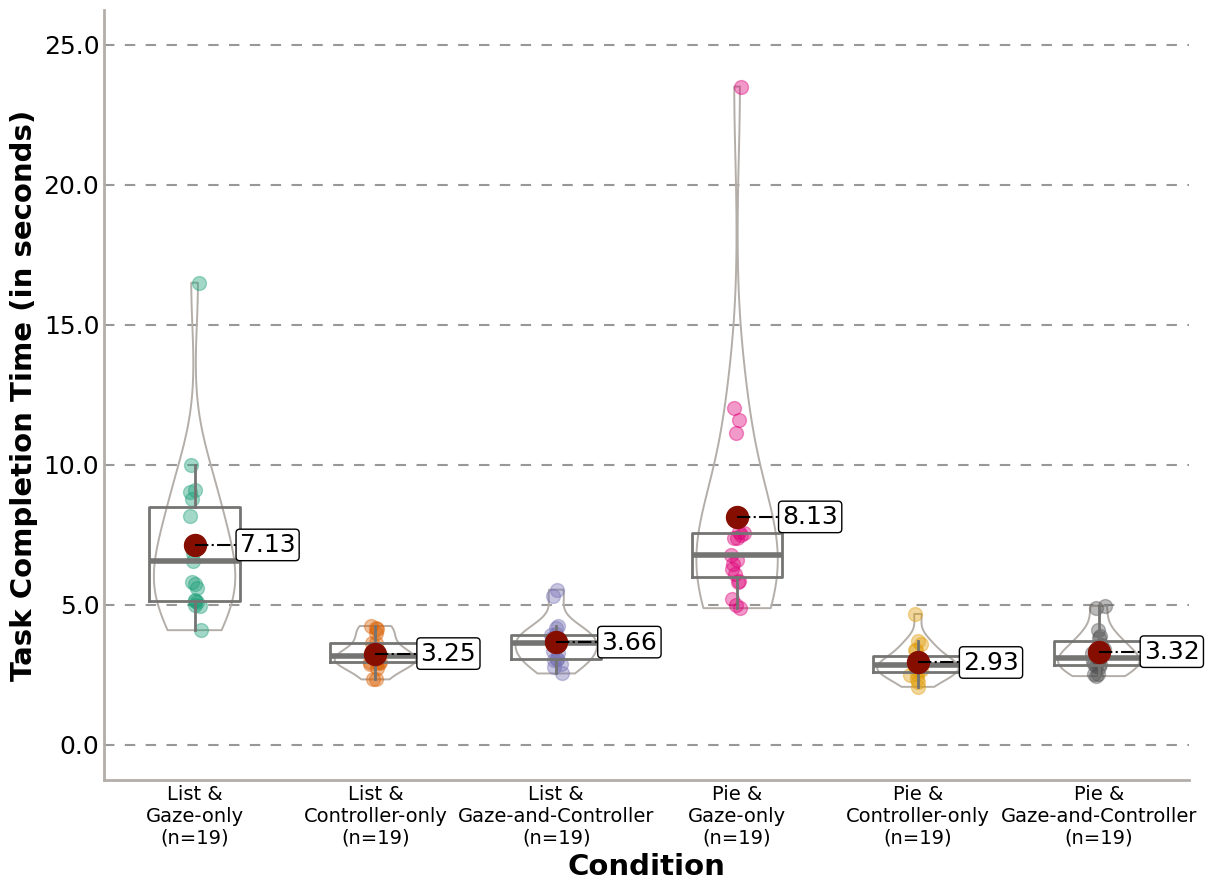

In [51]:
# Get the species, sorted alphabetically
species = sorted(df_eval["menu_modality"].unique())
species = ['List & Gaze-only', 'List & Controller-only', 'List & Gaze-and-Controller',
           'Pie & Gaze-only', 'Pie & Controller-only', 'Pie & Gaze-and-Controller']
# y_data is a list of length 3 containing the bill_length_mm values for each specie 
y_data = [df_eval[df_eval["menu_modality"] == specie]["completionTime"].values  / 1000. for specie in species]

xlabel = "Condition"
ylabel = "Task Completion Time (in seconds)"
x_lines = np.arange(0, 26, 5, dtype=np.float64)

stateval.make_plot(y_data, species, xlabel, ylabel, save_figure_as="plots/task-completion-time-combinations.png", x_lines=x_lines)